## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                              77.08
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                    3.36e-99
Time:                        15:50:29   Log-Likelihood:                         -296.59
No. Observations:                 404   AIC:                                      619.2
Df Residuals:                     391   BIC:                                      671.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


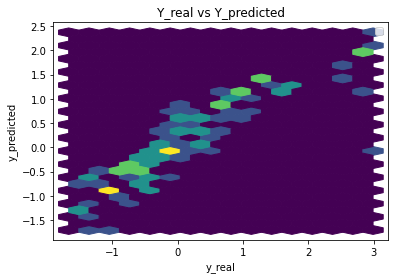

Performance Metrics
Mean Squared Error: 0.2935705752503102
Mean Absolute Error: 0.3717524858292614
Manhattan distance: 37.91875355458465
Euclidean distance: 5.472129263415809


Stats Model MAE 0.3717524858292614


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548


0:	learn: 0.9311381	total: 61.1ms	remaining: 1m 1s
1:	learn: 0.9100129	total: 72.5ms	remaining: 36.2s
2:	learn: 0.8904171	total: 74.6ms	remaining: 24.8s
3:	learn: 0.8714576	total: 80.8ms	remaining: 20.1s
4:	learn: 0.8552026	total: 85.9ms	remaining: 17.1s
5:	learn: 0.8387630	total: 88ms	remaining: 14.6s
6:	learn: 0.8236838	total: 91.5ms	remaining: 13s
7:	learn: 0.8082310	total: 95.5ms	remaining: 11.8s
8:	learn: 0.7936233	total: 101ms	remaining: 11.1s
9:	learn: 0.7779927	total: 102ms	remaining: 10.1s
10:	learn: 0.7639263	total: 106ms	remaining: 9.51s


11:	learn: 0.7499843	total: 108ms	remaining: 8.9s
12:	learn: 0.7360035	total: 113ms	remaining: 8.55s
13:	learn: 0.7224901	total: 115ms	remaining: 8.13s
14:	learn: 0.7109368	total: 117ms	remaining: 7.69s
15:	learn: 0.6994284	total: 121ms	remaining: 7.45s
16:	learn: 0.6887499	total: 124ms	remaining: 7.17s
17:	learn: 0.6773409	total: 128ms	remaining: 6.98s
18:	learn: 0.6657236	total: 130ms	remaining: 6.69s
19:	learn: 0.6540122	total: 131ms	remaining: 6.43s
20:	learn: 0.6426420	total: 134ms	remaining: 6.26s
21:	learn: 0.6319819	total: 136ms	remaining: 6.06s
22:	learn: 0.6216400	total: 139ms	remaining: 5.89s
23:	learn: 0.6136800	total: 141ms	remaining: 5.75s
24:	learn: 0.6041422	total: 143ms	remaining: 5.58s
25:	learn: 0.5957029	total: 144ms	remaining: 5.41s
26:	learn: 0.5878598	total: 148ms	remaining: 5.34s
27:	learn: 0.5790863	total: 150ms	remaining: 5.2s
28:	learn: 0.5708997	total: 154ms	remaining: 5.16s
29:	learn: 0.5618361	total: 156ms	remaining: 5.05s
30:	learn: 0.5531453	total: 158ms

31:	learn: 0.5441693	total: 161ms	remaining: 4.88s
32:	learn: 0.5372024	total: 164ms	remaining: 4.8s
33:	learn: 0.5317356	total: 166ms	remaining: 4.72s
34:	learn: 0.5252129	total: 170ms	remaining: 4.7s
35:	learn: 0.5185195	total: 172ms	remaining: 4.61s
36:	learn: 0.5119499	total: 175ms	remaining: 4.54s
37:	learn: 0.5051349	total: 177ms	remaining: 4.49s
38:	learn: 0.4980215	total: 179ms	remaining: 4.41s
39:	learn: 0.4910985	total: 183ms	remaining: 4.39s
40:	learn: 0.4854269	total: 185ms	remaining: 4.34s
41:	learn: 0.4800169	total: 187ms	remaining: 4.27s
42:	learn: 0.4742621	total: 191ms	remaining: 4.24s
43:	learn: 0.4685028	total: 192ms	remaining: 4.18s
44:	learn: 0.4614222	total: 194ms	remaining: 4.12s
45:	learn: 0.4555561	total: 199ms	remaining: 4.12s
46:	learn: 0.4523951	total: 203ms	remaining: 4.11s
47:	learn: 0.4483898	total: 205ms	remaining: 4.06s
48:	learn: 0.4440689	total: 207ms	remaining: 4.01s
49:	learn: 0.4386558	total: 210ms	remaining: 3.99s
50:	learn: 0.4348456	total: 212ms

53:	learn: 0.4217907	total: 223ms	remaining: 3.9s
54:	learn: 0.4179700	total: 225ms	remaining: 3.87s
55:	learn: 0.4146368	total: 230ms	remaining: 3.88s
56:	learn: 0.4109766	total: 238ms	remaining: 3.94s
57:	learn: 0.4071876	total: 265ms	remaining: 4.3s


58:	learn: 0.4035270	total: 291ms	remaining: 4.64s
59:	learn: 0.4001287	total: 295ms	remaining: 4.63s
60:	learn: 0.3963421	total: 302ms	remaining: 4.64s


61:	learn: 0.3930047	total: 307ms	remaining: 4.64s
62:	learn: 0.3897233	total: 311ms	remaining: 4.63s
63:	learn: 0.3870439	total: 315ms	remaining: 4.6s
64:	learn: 0.3847190	total: 320ms	remaining: 4.6s
65:	learn: 0.3816258	total: 324ms	remaining: 4.58s
66:	learn: 0.3782931	total: 326ms	remaining: 4.54s
67:	learn: 0.3750968	total: 328ms	remaining: 4.5s
68:	learn: 0.3725128	total: 332ms	remaining: 4.48s
69:	learn: 0.3704434	total: 334ms	remaining: 4.44s
70:	learn: 0.3673159	total: 338ms	remaining: 4.42s
71:	learn: 0.3644270	total: 340ms	remaining: 4.38s
72:	learn: 0.3621005	total: 344ms	remaining: 4.37s
73:	learn: 0.3590292	total: 347ms	remaining: 4.34s
74:	learn: 0.3563328	total: 350ms	remaining: 4.32s
75:	learn: 0.3544442	total: 355ms	remaining: 4.31s
76:	learn: 0.3522152	total: 361ms	remaining: 4.33s
77:	learn: 0.3493780	total: 366ms	remaining: 4.33s


78:	learn: 0.3472842	total: 372ms	remaining: 4.34s
79:	learn: 0.3452651	total: 376ms	remaining: 4.32s
80:	learn: 0.3434506	total: 378ms	remaining: 4.29s
81:	learn: 0.3413260	total: 381ms	remaining: 4.26s
82:	learn: 0.3399558	total: 383ms	remaining: 4.24s
83:	learn: 0.3385096	total: 387ms	remaining: 4.22s
84:	learn: 0.3361099	total: 388ms	remaining: 4.18s
85:	learn: 0.3340030	total: 390ms	remaining: 4.14s
86:	learn: 0.3322876	total: 391ms	remaining: 4.11s
87:	learn: 0.3304043	total: 394ms	remaining: 4.08s
88:	learn: 0.3287538	total: 396ms	remaining: 4.05s
89:	learn: 0.3261911	total: 398ms	remaining: 4.03s
90:	learn: 0.3242221	total: 402ms	remaining: 4.02s
91:	learn: 0.3224938	total: 405ms	remaining: 4s
92:	learn: 0.3210664	total: 410ms	remaining: 4s
93:	learn: 0.3192364	total: 412ms	remaining: 3.97s
94:	learn: 0.3176033	total: 413ms	remaining: 3.94s
95:	learn: 0.3162148	total: 416ms	remaining: 3.91s
96:	learn: 0.3148013	total: 417ms	remaining: 3.88s
97:	learn: 0.3132148	total: 419ms	rem

108:	learn: 0.2966522	total: 458ms	remaining: 3.75s
109:	learn: 0.2957285	total: 462ms	remaining: 3.73s
110:	learn: 0.2944743	total: 464ms	remaining: 3.71s
111:	learn: 0.2934251	total: 466ms	remaining: 3.69s
112:	learn: 0.2919810	total: 467ms	remaining: 3.67s
113:	learn: 0.2908156	total: 469ms	remaining: 3.64s


114:	learn: 0.2897917	total: 474ms	remaining: 3.65s
115:	learn: 0.2887296	total: 478ms	remaining: 3.65s
116:	learn: 0.2876856	total: 481ms	remaining: 3.63s
117:	learn: 0.2862229	total: 483ms	remaining: 3.61s
118:	learn: 0.2852417	total: 487ms	remaining: 3.6s
119:	learn: 0.2842640	total: 489ms	remaining: 3.59s
120:	learn: 0.2833175	total: 493ms	remaining: 3.58s
121:	learn: 0.2823222	total: 497ms	remaining: 3.57s
122:	learn: 0.2812571	total: 501ms	remaining: 3.57s
123:	learn: 0.2798492	total: 504ms	remaining: 3.56s
124:	learn: 0.2783163	total: 507ms	remaining: 3.55s
125:	learn: 0.2770804	total: 508ms	remaining: 3.53s
126:	learn: 0.2756077	total: 510ms	remaining: 3.5s
127:	learn: 0.2747006	total: 514ms	remaining: 3.5s
128:	learn: 0.2737547	total: 516ms	remaining: 3.48s
129:	learn: 0.2728260	total: 518ms	remaining: 3.47s
130:	learn: 0.2719371	total: 521ms	remaining: 3.45s
131:	learn: 0.2708878	total: 522ms	remaining: 3.44s
132:	learn: 0.2699320	total: 524ms	remaining: 3.42s
133:	learn: 0.2

138:	learn: 0.2640715	total: 536ms	remaining: 3.32s
139:	learn: 0.2631989	total: 538ms	remaining: 3.31s
140:	learn: 0.2623394	total: 540ms	remaining: 3.29s
141:	learn: 0.2613806	total: 542ms	remaining: 3.27s
142:	learn: 0.2605867	total: 544ms	remaining: 3.26s
143:	learn: 0.2597098	total: 546ms	remaining: 3.24s
144:	learn: 0.2588425	total: 547ms	remaining: 3.23s
145:	learn: 0.2579096	total: 550ms	remaining: 3.21s
146:	learn: 0.2569295	total: 551ms	remaining: 3.2s
147:	learn: 0.2562963	total: 552ms	remaining: 3.18s
148:	learn: 0.2551187	total: 554ms	remaining: 3.16s
149:	learn: 0.2544970	total: 555ms	remaining: 3.15s
150:	learn: 0.2535003	total: 557ms	remaining: 3.13s
151:	learn: 0.2527740	total: 558ms	remaining: 3.11s
152:	learn: 0.2521029	total: 560ms	remaining: 3.1s
153:	learn: 0.2515601	total: 561ms	remaining: 3.08s
154:	learn: 0.2509329	total: 563ms	remaining: 3.07s
155:	learn: 0.2501892	total: 565ms	remaining: 3.06s
156:	learn: 0.2492277	total: 566ms	remaining: 3.04s
157:	learn: 0.

168:	learn: 0.2395952	total: 657ms	remaining: 3.23s
169:	learn: 0.2388095	total: 662ms	remaining: 3.23s
170:	learn: 0.2380860	total: 668ms	remaining: 3.24s


171:	learn: 0.2372145	total: 671ms	remaining: 3.23s
172:	learn: 0.2366808	total: 673ms	remaining: 3.22s
173:	learn: 0.2362247	total: 676ms	remaining: 3.21s
174:	learn: 0.2355383	total: 679ms	remaining: 3.2s
175:	learn: 0.2350020	total: 682ms	remaining: 3.19s
176:	learn: 0.2341448	total: 686ms	remaining: 3.19s
177:	learn: 0.2336027	total: 689ms	remaining: 3.18s
178:	learn: 0.2329798	total: 691ms	remaining: 3.17s
179:	learn: 0.2324100	total: 693ms	remaining: 3.16s
180:	learn: 0.2317243	total: 695ms	remaining: 3.14s
181:	learn: 0.2307365	total: 697ms	remaining: 3.13s
182:	learn: 0.2302262	total: 699ms	remaining: 3.12s
183:	learn: 0.2297042	total: 701ms	remaining: 3.11s
184:	learn: 0.2289828	total: 703ms	remaining: 3.1s
185:	learn: 0.2285073	total: 705ms	remaining: 3.08s
186:	learn: 0.2278527	total: 706ms	remaining: 3.07s
187:	learn: 0.2273413	total: 708ms	remaining: 3.06s
188:	learn: 0.2267498	total: 709ms	remaining: 3.04s
189:	learn: 0.2262619	total: 711ms	remaining: 3.03s
190:	learn: 0.

217:	learn: 0.2099976	total: 801ms	remaining: 2.87s
218:	learn: 0.2093796	total: 804ms	remaining: 2.87s
219:	learn: 0.2089708	total: 806ms	remaining: 2.86s
220:	learn: 0.2083288	total: 807ms	remaining: 2.84s
221:	learn: 0.2077919	total: 808ms	remaining: 2.83s
222:	learn: 0.2074311	total: 811ms	remaining: 2.83s
223:	learn: 0.2070557	total: 813ms	remaining: 2.82s
224:	learn: 0.2064493	total: 814ms	remaining: 2.8s
225:	learn: 0.2058835	total: 816ms	remaining: 2.79s
226:	learn: 0.2052558	total: 818ms	remaining: 2.78s
227:	learn: 0.2047984	total: 819ms	remaining: 2.77s
228:	learn: 0.2044729	total: 821ms	remaining: 2.76s
229:	learn: 0.2039831	total: 822ms	remaining: 2.75s
230:	learn: 0.2032729	total: 823ms	remaining: 2.74s
231:	learn: 0.2029209	total: 825ms	remaining: 2.73s
232:	learn: 0.2025448	total: 827ms	remaining: 2.72s
233:	learn: 0.2023267	total: 828ms	remaining: 2.71s
234:	learn: 0.2017438	total: 829ms	remaining: 2.7s
235:	learn: 0.2012991	total: 830ms	remaining: 2.69s
236:	learn: 0.

239:	learn: 0.1994462	total: 849ms	remaining: 2.69s
240:	learn: 0.1986783	total: 851ms	remaining: 2.68s
241:	learn: 0.1981143	total: 854ms	remaining: 2.67s
242:	learn: 0.1974308	total: 855ms	remaining: 2.66s
243:	learn: 0.1969039	total: 857ms	remaining: 2.65s
244:	learn: 0.1963861	total: 862ms	remaining: 2.66s
245:	learn: 0.1958807	total: 864ms	remaining: 2.65s
246:	learn: 0.1955630	total: 866ms	remaining: 2.64s
247:	learn: 0.1951635	total: 869ms	remaining: 2.63s
248:	learn: 0.1947156	total: 871ms	remaining: 2.63s
249:	learn: 0.1941367	total: 873ms	remaining: 2.62s
250:	learn: 0.1937267	total: 875ms	remaining: 2.61s
251:	learn: 0.1932707	total: 877ms	remaining: 2.6s
252:	learn: 0.1926627	total: 878ms	remaining: 2.59s
253:	learn: 0.1922156	total: 881ms	remaining: 2.59s
254:	learn: 0.1917950	total: 885ms	remaining: 2.58s
255:	learn: 0.1913834	total: 888ms	remaining: 2.58s
256:	learn: 0.1909347	total: 891ms	remaining: 2.58s
257:	learn: 0.1903867	total: 893ms	remaining: 2.57s
258:	learn: 0

293:	learn: 0.1764742	total: 969ms	remaining: 2.33s
294:	learn: 0.1761022	total: 972ms	remaining: 2.32s
295:	learn: 0.1758569	total: 974ms	remaining: 2.32s
296:	learn: 0.1754004	total: 976ms	remaining: 2.31s
297:	learn: 0.1750388	total: 978ms	remaining: 2.3s
298:	learn: 0.1748581	total: 981ms	remaining: 2.3s
299:	learn: 0.1743579	total: 983ms	remaining: 2.29s
300:	learn: 0.1739811	total: 985ms	remaining: 2.29s
301:	learn: 0.1735675	total: 988ms	remaining: 2.28s
302:	learn: 0.1732063	total: 990ms	remaining: 2.28s
303:	learn: 0.1729527	total: 992ms	remaining: 2.27s
304:	learn: 0.1725458	total: 995ms	remaining: 2.27s
305:	learn: 0.1721937	total: 997ms	remaining: 2.26s
306:	learn: 0.1716533	total: 1s	remaining: 2.26s
307:	learn: 0.1712242	total: 1.01s	remaining: 2.26s
308:	learn: 0.1709249	total: 1.01s	remaining: 2.26s
309:	learn: 0.1705874	total: 1.01s	remaining: 2.25s


310:	learn: 0.1702098	total: 1.01s	remaining: 2.25s
311:	learn: 0.1699681	total: 1.02s	remaining: 2.24s
312:	learn: 0.1696437	total: 1.02s	remaining: 2.23s
313:	learn: 0.1691150	total: 1.02s	remaining: 2.23s
314:	learn: 0.1688724	total: 1.02s	remaining: 2.22s
315:	learn: 0.1687344	total: 1.02s	remaining: 2.22s
316:	learn: 0.1683052	total: 1.03s	remaining: 2.21s
317:	learn: 0.1679586	total: 1.03s	remaining: 2.21s
318:	learn: 0.1675714	total: 1.03s	remaining: 2.2s
319:	learn: 0.1673036	total: 1.03s	remaining: 2.2s
320:	learn: 0.1669148	total: 1.03s	remaining: 2.19s
321:	learn: 0.1665119	total: 1.04s	remaining: 2.19s
322:	learn: 0.1661643	total: 1.04s	remaining: 2.19s
323:	learn: 0.1657972	total: 1.05s	remaining: 2.19s
324:	learn: 0.1653665	total: 1.05s	remaining: 2.19s
325:	learn: 0.1650607	total: 1.06s	remaining: 2.19s
326:	learn: 0.1649414	total: 1.06s	remaining: 2.18s
327:	learn: 0.1645300	total: 1.06s	remaining: 2.17s
328:	learn: 0.1640910	total: 1.06s	remaining: 2.17s
329:	learn: 0.

353:	learn: 0.1561050	total: 1.14s	remaining: 2.09s
354:	learn: 0.1557067	total: 1.15s	remaining: 2.08s
355:	learn: 0.1554957	total: 1.15s	remaining: 2.08s
356:	learn: 0.1552757	total: 1.15s	remaining: 2.08s
357:	learn: 0.1549162	total: 1.16s	remaining: 2.07s
358:	learn: 0.1545985	total: 1.16s	remaining: 2.07s
359:	learn: 0.1543580	total: 1.16s	remaining: 2.07s
360:	learn: 0.1541589	total: 1.17s	remaining: 2.06s
361:	learn: 0.1538080	total: 1.17s	remaining: 2.06s
362:	learn: 0.1536192	total: 1.17s	remaining: 2.06s
363:	learn: 0.1531901	total: 1.17s	remaining: 2.05s
364:	learn: 0.1530331	total: 1.18s	remaining: 2.05s
365:	learn: 0.1528906	total: 1.18s	remaining: 2.04s
366:	learn: 0.1528012	total: 1.18s	remaining: 2.04s
367:	learn: 0.1526026	total: 1.18s	remaining: 2.03s
368:	learn: 0.1523090	total: 1.19s	remaining: 2.03s


369:	learn: 0.1519774	total: 1.19s	remaining: 2.02s
370:	learn: 0.1516826	total: 1.19s	remaining: 2.02s
371:	learn: 0.1512688	total: 1.19s	remaining: 2.01s
372:	learn: 0.1508181	total: 1.2s	remaining: 2.01s
373:	learn: 0.1506649	total: 1.2s	remaining: 2s
374:	learn: 0.1504233	total: 1.2s	remaining: 2s
375:	learn: 0.1502030	total: 1.2s	remaining: 2s
376:	learn: 0.1499714	total: 1.21s	remaining: 1.99s
377:	learn: 0.1498383	total: 1.21s	remaining: 1.99s
378:	learn: 0.1495039	total: 1.21s	remaining: 1.99s
379:	learn: 0.1491124	total: 1.21s	remaining: 1.98s
380:	learn: 0.1487548	total: 1.22s	remaining: 1.98s
381:	learn: 0.1484796	total: 1.22s	remaining: 1.97s
382:	learn: 0.1482741	total: 1.22s	remaining: 1.97s
383:	learn: 0.1480705	total: 1.22s	remaining: 1.96s
384:	learn: 0.1476952	total: 1.23s	remaining: 1.96s
385:	learn: 0.1473833	total: 1.23s	remaining: 1.96s
386:	learn: 0.1472659	total: 1.23s	remaining: 1.95s
387:	learn: 0.1470394	total: 1.23s	remaining: 1.95s
388:	learn: 0.1466744	tot

428:	learn: 0.1362777	total: 1.32s	remaining: 1.76s
429:	learn: 0.1360172	total: 1.33s	remaining: 1.76s
430:	learn: 0.1356389	total: 1.33s	remaining: 1.75s
431:	learn: 0.1355794	total: 1.33s	remaining: 1.75s
432:	learn: 0.1353580	total: 1.33s	remaining: 1.74s
433:	learn: 0.1350452	total: 1.33s	remaining: 1.74s
434:	learn: 0.1348639	total: 1.34s	remaining: 1.74s
435:	learn: 0.1345299	total: 1.34s	remaining: 1.73s
436:	learn: 0.1342641	total: 1.34s	remaining: 1.73s
437:	learn: 0.1340858	total: 1.34s	remaining: 1.72s
438:	learn: 0.1337528	total: 1.34s	remaining: 1.72s
439:	learn: 0.1335218	total: 1.35s	remaining: 1.71s
440:	learn: 0.1332572	total: 1.35s	remaining: 1.71s
441:	learn: 0.1330217	total: 1.35s	remaining: 1.71s
442:	learn: 0.1329633	total: 1.35s	remaining: 1.7s
443:	learn: 0.1327577	total: 1.36s	remaining: 1.7s
444:	learn: 0.1325085	total: 1.36s	remaining: 1.69s
445:	learn: 0.1322306	total: 1.36s	remaining: 1.69s
446:	learn: 0.1319306	total: 1.36s	remaining: 1.69s
447:	learn: 0.

449:	learn: 0.1312350	total: 1.37s	remaining: 1.67s
450:	learn: 0.1311939	total: 1.37s	remaining: 1.67s
451:	learn: 0.1308690	total: 1.38s	remaining: 1.67s
452:	learn: 0.1306471	total: 1.38s	remaining: 1.66s
453:	learn: 0.1304494	total: 1.38s	remaining: 1.66s
454:	learn: 0.1300041	total: 1.38s	remaining: 1.65s
455:	learn: 0.1297745	total: 1.38s	remaining: 1.65s
456:	learn: 0.1295478	total: 1.38s	remaining: 1.64s
457:	learn: 0.1294771	total: 1.39s	remaining: 1.64s
458:	learn: 0.1292188	total: 1.39s	remaining: 1.64s
459:	learn: 0.1289983	total: 1.39s	remaining: 1.63s
460:	learn: 0.1287191	total: 1.39s	remaining: 1.63s
461:	learn: 0.1284945	total: 1.39s	remaining: 1.62s
462:	learn: 0.1282565	total: 1.4s	remaining: 1.62s
463:	learn: 0.1280727	total: 1.4s	remaining: 1.62s
464:	learn: 0.1277413	total: 1.4s	remaining: 1.61s
465:	learn: 0.1275681	total: 1.4s	remaining: 1.61s
466:	learn: 0.1274982	total: 1.4s	remaining: 1.6s
467:	learn: 0.1274594	total: 1.41s	remaining: 1.6s
468:	learn: 0.12731

496:	learn: 0.1207421	total: 1.5s	remaining: 1.52s
497:	learn: 0.1204701	total: 1.5s	remaining: 1.52s
498:	learn: 0.1201432	total: 1.51s	remaining: 1.51s
499:	learn: 0.1199351	total: 1.51s	remaining: 1.51s
500:	learn: 0.1198965	total: 1.51s	remaining: 1.5s
501:	learn: 0.1198808	total: 1.51s	remaining: 1.5s
502:	learn: 0.1196874	total: 1.52s	remaining: 1.5s
503:	learn: 0.1195143	total: 1.52s	remaining: 1.5s
504:	learn: 0.1194942	total: 1.52s	remaining: 1.49s
505:	learn: 0.1193237	total: 1.52s	remaining: 1.49s
506:	learn: 0.1191358	total: 1.53s	remaining: 1.48s
507:	learn: 0.1188494	total: 1.53s	remaining: 1.48s
508:	learn: 0.1186355	total: 1.53s	remaining: 1.48s
509:	learn: 0.1184676	total: 1.53s	remaining: 1.47s
510:	learn: 0.1182439	total: 1.54s	remaining: 1.47s
511:	learn: 0.1180539	total: 1.54s	remaining: 1.47s


512:	learn: 0.1178159	total: 1.54s	remaining: 1.46s
513:	learn: 0.1175042	total: 1.55s	remaining: 1.46s
514:	learn: 0.1173023	total: 1.55s	remaining: 1.46s
515:	learn: 0.1170308	total: 1.55s	remaining: 1.46s
516:	learn: 0.1168694	total: 1.56s	remaining: 1.46s
517:	learn: 0.1165732	total: 1.56s	remaining: 1.45s
518:	learn: 0.1163700	total: 1.56s	remaining: 1.45s
519:	learn: 0.1160984	total: 1.57s	remaining: 1.45s
520:	learn: 0.1158597	total: 1.57s	remaining: 1.44s
521:	learn: 0.1155498	total: 1.57s	remaining: 1.44s
522:	learn: 0.1153596	total: 1.58s	remaining: 1.44s
523:	learn: 0.1150499	total: 1.58s	remaining: 1.43s
524:	learn: 0.1148026	total: 1.58s	remaining: 1.43s
525:	learn: 0.1147028	total: 1.58s	remaining: 1.43s
526:	learn: 0.1145492	total: 1.59s	remaining: 1.42s
527:	learn: 0.1144247	total: 1.59s	remaining: 1.42s
528:	learn: 0.1142706	total: 1.59s	remaining: 1.42s
529:	learn: 0.1139835	total: 1.59s	remaining: 1.41s
530:	learn: 0.1136172	total: 1.6s	remaining: 1.41s
531:	learn: 0

564:	learn: 0.1069518	total: 1.68s	remaining: 1.29s
565:	learn: 0.1068181	total: 1.68s	remaining: 1.29s
566:	learn: 0.1064921	total: 1.69s	remaining: 1.29s
567:	learn: 0.1064399	total: 1.69s	remaining: 1.28s
568:	learn: 0.1064078	total: 1.69s	remaining: 1.28s
569:	learn: 0.1060905	total: 1.7s	remaining: 1.28s
570:	learn: 0.1059261	total: 1.7s	remaining: 1.28s
571:	learn: 0.1057117	total: 1.7s	remaining: 1.27s
572:	learn: 0.1056897	total: 1.71s	remaining: 1.27s
573:	learn: 0.1054433	total: 1.71s	remaining: 1.27s
574:	learn: 0.1052898	total: 1.71s	remaining: 1.26s
575:	learn: 0.1049057	total: 1.71s	remaining: 1.26s
576:	learn: 0.1047083	total: 1.71s	remaining: 1.25s
577:	learn: 0.1045103	total: 1.71s	remaining: 1.25s
578:	learn: 0.1043836	total: 1.72s	remaining: 1.25s
579:	learn: 0.1043533	total: 1.72s	remaining: 1.24s


580:	learn: 0.1041465	total: 1.72s	remaining: 1.24s
581:	learn: 0.1039942	total: 1.72s	remaining: 1.24s
582:	learn: 0.1038065	total: 1.72s	remaining: 1.23s
583:	learn: 0.1036427	total: 1.73s	remaining: 1.23s
584:	learn: 0.1035216	total: 1.73s	remaining: 1.23s
585:	learn: 0.1033429	total: 1.73s	remaining: 1.22s
586:	learn: 0.1031493	total: 1.73s	remaining: 1.22s
587:	learn: 0.1029194	total: 1.73s	remaining: 1.22s
588:	learn: 0.1027192	total: 1.74s	remaining: 1.21s
589:	learn: 0.1024670	total: 1.74s	remaining: 1.21s
590:	learn: 0.1023314	total: 1.74s	remaining: 1.2s
591:	learn: 0.1021525	total: 1.74s	remaining: 1.2s
592:	learn: 0.1021322	total: 1.75s	remaining: 1.2s
593:	learn: 0.1019334	total: 1.75s	remaining: 1.2s
594:	learn: 0.1018380	total: 1.75s	remaining: 1.19s
595:	learn: 0.1015919	total: 1.75s	remaining: 1.19s
596:	learn: 0.1014463	total: 1.75s	remaining: 1.18s
597:	learn: 0.1012932	total: 1.75s	remaining: 1.18s
598:	learn: 0.1010919	total: 1.76s	remaining: 1.18s
599:	learn: 0.10

643:	learn: 0.0940884	total: 1.86s	remaining: 1.03s
644:	learn: 0.0939990	total: 1.86s	remaining: 1.02s
645:	learn: 0.0938813	total: 1.86s	remaining: 1.02s
646:	learn: 0.0936956	total: 1.87s	remaining: 1.02s
647:	learn: 0.0934298	total: 1.87s	remaining: 1.01s
648:	learn: 0.0932890	total: 1.87s	remaining: 1.01s
649:	learn: 0.0930636	total: 1.87s	remaining: 1.01s
650:	learn: 0.0929944	total: 1.87s	remaining: 1s
651:	learn: 0.0928226	total: 1.88s	remaining: 1s
652:	learn: 0.0926699	total: 1.88s	remaining: 998ms
653:	learn: 0.0925063	total: 1.88s	remaining: 995ms
654:	learn: 0.0923407	total: 1.88s	remaining: 992ms
655:	learn: 0.0921418	total: 1.89s	remaining: 989ms
656:	learn: 0.0920889	total: 1.89s	remaining: 986ms
657:	learn: 0.0919870	total: 1.89s	remaining: 982ms
658:	learn: 0.0918779	total: 1.89s	remaining: 979ms
659:	learn: 0.0916829	total: 1.89s	remaining: 975ms
660:	learn: 0.0915465	total: 1.89s	remaining: 972ms
661:	learn: 0.0913020	total: 1.9s	remaining: 968ms
662:	learn: 0.09120

663:	learn: 0.0910027	total: 1.9s	remaining: 961ms
664:	learn: 0.0908399	total: 1.9s	remaining: 958ms
665:	learn: 0.0907675	total: 1.9s	remaining: 955ms
666:	learn: 0.0905525	total: 1.91s	remaining: 952ms
667:	learn: 0.0903213	total: 1.91s	remaining: 949ms
668:	learn: 0.0901458	total: 1.91s	remaining: 945ms
669:	learn: 0.0901295	total: 1.91s	remaining: 942ms
670:	learn: 0.0900492	total: 1.92s	remaining: 939ms
671:	learn: 0.0899488	total: 1.92s	remaining: 936ms
672:	learn: 0.0897336	total: 1.92s	remaining: 933ms
673:	learn: 0.0894541	total: 1.92s	remaining: 929ms
674:	learn: 0.0893090	total: 1.92s	remaining: 926ms
675:	learn: 0.0891216	total: 1.93s	remaining: 926ms
676:	learn: 0.0891099	total: 1.93s	remaining: 922ms
677:	learn: 0.0889713	total: 1.94s	remaining: 919ms
678:	learn: 0.0888416	total: 1.94s	remaining: 916ms
679:	learn: 0.0887445	total: 1.94s	remaining: 912ms
680:	learn: 0.0886772	total: 1.94s	remaining: 909ms
681:	learn: 0.0885313	total: 1.94s	remaining: 906ms
682:	learn: 0.0

716:	learn: 0.0843408	total: 2.04s	remaining: 807ms
717:	learn: 0.0841395	total: 2.05s	remaining: 805ms
718:	learn: 0.0840541	total: 2.05s	remaining: 802ms
719:	learn: 0.0840124	total: 2.05s	remaining: 799ms
720:	learn: 0.0840012	total: 2.06s	remaining: 796ms
721:	learn: 0.0838650	total: 2.06s	remaining: 792ms
722:	learn: 0.0838083	total: 2.06s	remaining: 789ms
723:	learn: 0.0836189	total: 2.06s	remaining: 786ms
724:	learn: 0.0833955	total: 2.06s	remaining: 783ms
725:	learn: 0.0832341	total: 2.06s	remaining: 779ms
726:	learn: 0.0829452	total: 2.07s	remaining: 776ms
727:	learn: 0.0828646	total: 2.07s	remaining: 773ms
728:	learn: 0.0827697	total: 2.07s	remaining: 770ms
729:	learn: 0.0826940	total: 2.07s	remaining: 767ms


730:	learn: 0.0825664	total: 2.08s	remaining: 764ms
731:	learn: 0.0824217	total: 2.08s	remaining: 762ms
732:	learn: 0.0822434	total: 2.08s	remaining: 759ms
733:	learn: 0.0821243	total: 2.09s	remaining: 756ms
734:	learn: 0.0820065	total: 2.09s	remaining: 753ms
735:	learn: 0.0818508	total: 2.09s	remaining: 750ms
736:	learn: 0.0816376	total: 2.09s	remaining: 747ms
737:	learn: 0.0816229	total: 2.1s	remaining: 744ms
738:	learn: 0.0815047	total: 2.1s	remaining: 741ms
739:	learn: 0.0814337	total: 2.1s	remaining: 737ms
740:	learn: 0.0813226	total: 2.1s	remaining: 734ms
741:	learn: 0.0812384	total: 2.1s	remaining: 731ms
742:	learn: 0.0810325	total: 2.1s	remaining: 728ms
743:	learn: 0.0809429	total: 2.11s	remaining: 725ms
744:	learn: 0.0807661	total: 2.11s	remaining: 722ms
745:	learn: 0.0806825	total: 2.11s	remaining: 719ms
746:	learn: 0.0805762	total: 2.11s	remaining: 716ms
747:	learn: 0.0805211	total: 2.11s	remaining: 712ms
748:	learn: 0.0803995	total: 2.12s	remaining: 709ms
749:	learn: 0.0802

801:	learn: 0.0746637	total: 2.23s	remaining: 549ms
802:	learn: 0.0745150	total: 2.23s	remaining: 547ms
803:	learn: 0.0744640	total: 2.23s	remaining: 544ms
804:	learn: 0.0743781	total: 2.23s	remaining: 541ms
805:	learn: 0.0742612	total: 2.23s	remaining: 538ms
806:	learn: 0.0740985	total: 2.24s	remaining: 535ms
807:	learn: 0.0739869	total: 2.24s	remaining: 532ms
808:	learn: 0.0739497	total: 2.24s	remaining: 529ms
809:	learn: 0.0739059	total: 2.24s	remaining: 526ms
810:	learn: 0.0737862	total: 2.24s	remaining: 523ms
811:	learn: 0.0736880	total: 2.24s	remaining: 520ms
812:	learn: 0.0736390	total: 2.25s	remaining: 517ms
813:	learn: 0.0735856	total: 2.25s	remaining: 514ms
814:	learn: 0.0734332	total: 2.25s	remaining: 511ms
815:	learn: 0.0733380	total: 2.25s	remaining: 508ms
816:	learn: 0.0733065	total: 2.25s	remaining: 505ms
817:	learn: 0.0732046	total: 2.25s	remaining: 502ms


818:	learn: 0.0730674	total: 2.26s	remaining: 499ms
819:	learn: 0.0729357	total: 2.26s	remaining: 496ms
820:	learn: 0.0728026	total: 2.26s	remaining: 493ms
821:	learn: 0.0726718	total: 2.26s	remaining: 490ms
822:	learn: 0.0725235	total: 2.27s	remaining: 488ms
823:	learn: 0.0725078	total: 2.27s	remaining: 485ms
824:	learn: 0.0724037	total: 2.27s	remaining: 482ms
825:	learn: 0.0723566	total: 2.27s	remaining: 479ms
826:	learn: 0.0721788	total: 2.27s	remaining: 476ms
827:	learn: 0.0721060	total: 2.28s	remaining: 473ms
828:	learn: 0.0719682	total: 2.28s	remaining: 470ms
829:	learn: 0.0717657	total: 2.28s	remaining: 467ms
830:	learn: 0.0716170	total: 2.28s	remaining: 464ms
831:	learn: 0.0715126	total: 2.28s	remaining: 461ms
832:	learn: 0.0713333	total: 2.28s	remaining: 458ms
833:	learn: 0.0711710	total: 2.29s	remaining: 455ms
834:	learn: 0.0711632	total: 2.29s	remaining: 452ms
835:	learn: 0.0710985	total: 2.29s	remaining: 450ms
836:	learn: 0.0709633	total: 2.29s	remaining: 447ms
837:	learn: 

889:	learn: 0.0652715	total: 2.4s	remaining: 297ms
890:	learn: 0.0651473	total: 2.4s	remaining: 294ms
891:	learn: 0.0650254	total: 2.4s	remaining: 291ms
892:	learn: 0.0649277	total: 2.41s	remaining: 288ms
893:	learn: 0.0648539	total: 2.41s	remaining: 286ms
894:	learn: 0.0647928	total: 2.41s	remaining: 283ms
895:	learn: 0.0646994	total: 2.41s	remaining: 280ms
896:	learn: 0.0646075	total: 2.42s	remaining: 277ms
897:	learn: 0.0645271	total: 2.42s	remaining: 275ms
898:	learn: 0.0643946	total: 2.42s	remaining: 272ms
899:	learn: 0.0643017	total: 2.42s	remaining: 269ms
900:	learn: 0.0642277	total: 2.42s	remaining: 266ms
901:	learn: 0.0641793	total: 2.42s	remaining: 263ms
902:	learn: 0.0640935	total: 2.43s	remaining: 261ms


903:	learn: 0.0640083	total: 2.43s	remaining: 258ms
904:	learn: 0.0638964	total: 2.43s	remaining: 255ms
905:	learn: 0.0638322	total: 2.43s	remaining: 252ms
906:	learn: 0.0637651	total: 2.44s	remaining: 250ms
907:	learn: 0.0636939	total: 2.44s	remaining: 247ms
908:	learn: 0.0636658	total: 2.44s	remaining: 244ms
909:	learn: 0.0635510	total: 2.44s	remaining: 242ms
910:	learn: 0.0634430	total: 2.44s	remaining: 239ms
911:	learn: 0.0634100	total: 2.45s	remaining: 236ms
912:	learn: 0.0633449	total: 2.45s	remaining: 233ms
913:	learn: 0.0632142	total: 2.45s	remaining: 231ms
914:	learn: 0.0631762	total: 2.45s	remaining: 228ms
915:	learn: 0.0631038	total: 2.45s	remaining: 225ms
916:	learn: 0.0629673	total: 2.46s	remaining: 222ms
917:	learn: 0.0629065	total: 2.46s	remaining: 220ms
918:	learn: 0.0627885	total: 2.46s	remaining: 217ms
919:	learn: 0.0626877	total: 2.46s	remaining: 214ms
920:	learn: 0.0626450	total: 2.46s	remaining: 211ms
921:	learn: 0.0625783	total: 2.47s	remaining: 209ms
922:	learn: 

957:	learn: 0.0597324	total: 2.57s	remaining: 113ms
958:	learn: 0.0596559	total: 2.58s	remaining: 110ms
959:	learn: 0.0595566	total: 2.58s	remaining: 107ms
960:	learn: 0.0595019	total: 2.59s	remaining: 105ms
961:	learn: 0.0594245	total: 2.59s	remaining: 102ms
962:	learn: 0.0593217	total: 2.59s	remaining: 99.6ms
963:	learn: 0.0592679	total: 2.6s	remaining: 97ms
964:	learn: 0.0592155	total: 2.6s	remaining: 94.3ms


965:	learn: 0.0591006	total: 2.6s	remaining: 91.6ms
966:	learn: 0.0589924	total: 2.6s	remaining: 88.9ms
967:	learn: 0.0589240	total: 2.61s	remaining: 86.2ms
968:	learn: 0.0588499	total: 2.61s	remaining: 83.5ms
969:	learn: 0.0587155	total: 2.61s	remaining: 80.8ms
970:	learn: 0.0586477	total: 2.62s	remaining: 78.2ms
971:	learn: 0.0585927	total: 2.62s	remaining: 75.5ms
972:	learn: 0.0585218	total: 2.62s	remaining: 72.8ms
973:	learn: 0.0584883	total: 2.63s	remaining: 70.1ms
974:	learn: 0.0583841	total: 2.63s	remaining: 67.4ms
975:	learn: 0.0583367	total: 2.63s	remaining: 64.7ms
976:	learn: 0.0582908	total: 2.63s	remaining: 62ms
977:	learn: 0.0582408	total: 2.64s	remaining: 59.3ms
978:	learn: 0.0581522	total: 2.64s	remaining: 56.7ms
979:	learn: 0.0580577	total: 2.65s	remaining: 54ms
980:	learn: 0.0579771	total: 2.65s	remaining: 51.3ms
981:	learn: 0.0579146	total: 2.66s	remaining: 48.8ms
982:	learn: 0.0579090	total: 2.66s	remaining: 46ms
983:	learn: 0.0578369	total: 2.66s	remaining: 43.3ms
9

Mean Absolute error 0.20399645456679538


Catboost MAE 0.20399645456679538


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.65888 | train_mse: 1.00292 | train_mae: 0.77615 |  0:00:03s


epoch 1  | loss: 0.90011 | train_mse: 0.71629 | train_mae: 0.59035 |  0:00:03s


epoch 2  | loss: 0.50976 | train_mse: 0.46877 | train_mae: 0.5039  |  0:00:03s


epoch 3  | loss: 0.43159 | train_mse: 0.45383 | train_mae: 0.49475 |  0:00:04s


epoch 4  | loss: 0.50499 | train_mse: 0.3541  | train_mae: 0.40798 |  0:00:04s


epoch 5  | loss: 0.40042 | train_mse: 0.4768  | train_mae: 0.49132 |  0:00:04s


epoch 6  | loss: 0.35834 | train_mse: 0.32409 | train_mae: 0.39621 |  0:00:05s


epoch 7  | loss: 0.25938 | train_mse: 0.46432 | train_mae: 0.44991 |  0:00:05s


epoch 8  | loss: 0.28083 | train_mse: 0.24802 | train_mae: 0.3254  |  0:00:06s


epoch 9  | loss: 0.24208 | train_mse: 0.26121 | train_mae: 0.34488 |  0:00:06s


epoch 10 | loss: 0.22523 | train_mse: 0.20469 | train_mae: 0.31041 |  0:00:06s


epoch 11 | loss: 0.28958 | train_mse: 0.21909 | train_mae: 0.31762 |  0:00:07s


epoch 12 | loss: 0.24821 | train_mse: 0.23189 | train_mae: 0.30001 |  0:00:08s


epoch 13 | loss: 0.25791 | train_mse: 0.22431 | train_mae: 0.32391 |  0:00:08s


epoch 14 | loss: 0.30715 | train_mse: 0.14367 | train_mae: 0.27168 |  0:00:09s


epoch 15 | loss: 0.2333  | train_mse: 0.17098 | train_mae: 0.29612 |  0:00:09s


epoch 16 | loss: 0.21721 | train_mse: 0.1711  | train_mae: 0.29476 |  0:00:09s


epoch 17 | loss: 0.21194 | train_mse: 0.17383 | train_mae: 0.29814 |  0:00:10s


epoch 18 | loss: 0.22599 | train_mse: 0.14379 | train_mae: 0.27841 |  0:00:10s


epoch 19 | loss: 0.19713 | train_mse: 0.14775 | train_mae: 0.27422 |  0:00:10s


epoch 20 | loss: 0.19401 | train_mse: 0.13919 | train_mae: 0.27438 |  0:00:11s


epoch 21 | loss: 0.19942 | train_mse: 0.14344 | train_mae: 0.27231 |  0:00:11s


epoch 22 | loss: 0.25882 | train_mse: 0.17003 | train_mae: 0.298   |  0:00:11s


epoch 23 | loss: 0.26068 | train_mse: 0.14447 | train_mae: 0.27875 |  0:00:12s


epoch 24 | loss: 0.22669 | train_mse: 0.15678 | train_mae: 0.28504 |  0:00:12s


epoch 25 | loss: 0.15374 | train_mse: 0.12089 | train_mae: 0.26127 |  0:00:13s


epoch 26 | loss: 0.15733 | train_mse: 0.12893 | train_mae: 0.26922 |  0:00:13s


epoch 27 | loss: 0.21313 | train_mse: 0.11328 | train_mae: 0.25906 |  0:00:14s


epoch 28 | loss: 0.208   | train_mse: 0.12626 | train_mae: 0.26541 |  0:00:14s


epoch 29 | loss: 0.2128  | train_mse: 0.13266 | train_mae: 0.26719 |  0:00:15s


epoch 30 | loss: 0.2267  | train_mse: 0.10892 | train_mae: 0.24812 |  0:00:15s


epoch 31 | loss: 0.19427 | train_mse: 0.10249 | train_mae: 0.24014 |  0:00:15s


epoch 32 | loss: 0.20036 | train_mse: 0.11155 | train_mae: 0.24562 |  0:00:16s


epoch 33 | loss: 0.19538 | train_mse: 0.12585 | train_mae: 0.25503 |  0:00:16s


epoch 34 | loss: 0.174   | train_mse: 0.11362 | train_mae: 0.24101 |  0:00:17s


epoch 35 | loss: 0.17308 | train_mse: 0.09994 | train_mae: 0.23469 |  0:00:17s


epoch 36 | loss: 0.15118 | train_mse: 0.09809 | train_mae: 0.23144 |  0:00:18s


epoch 37 | loss: 0.15558 | train_mse: 0.12107 | train_mae: 0.26346 |  0:00:18s


epoch 38 | loss: 0.17529 | train_mse: 0.10499 | train_mae: 0.24344 |  0:00:19s


epoch 39 | loss: 0.19043 | train_mse: 0.10882 | train_mae: 0.24381 |  0:00:19s


epoch 40 | loss: 0.14398 | train_mse: 0.0873  | train_mae: 0.21965 |  0:00:20s


epoch 41 | loss: 0.20834 | train_mse: 0.10127 | train_mae: 0.2365  |  0:00:21s


epoch 42 | loss: 0.14712 | train_mse: 0.10243 | train_mae: 0.24005 |  0:00:21s


epoch 43 | loss: 0.15071 | train_mse: 0.09326 | train_mae: 0.22624 |  0:00:22s


epoch 44 | loss: 0.13281 | train_mse: 0.09572 | train_mae: 0.23113 |  0:00:22s


epoch 45 | loss: 0.11747 | train_mse: 0.10214 | train_mae: 0.22691 |  0:00:22s


epoch 46 | loss: 0.13902 | train_mse: 0.09121 | train_mae: 0.22306 |  0:00:23s


epoch 47 | loss: 0.14957 | train_mse: 0.09166 | train_mae: 0.22626 |  0:00:24s


epoch 48 | loss: 0.13233 | train_mse: 0.08843 | train_mae: 0.22185 |  0:00:24s


epoch 49 | loss: 0.14518 | train_mse: 0.08995 | train_mae: 0.22175 |  0:00:25s


epoch 50 | loss: 0.15095 | train_mse: 0.09708 | train_mae: 0.23123 |  0:00:26s


epoch 51 | loss: 0.14225 | train_mse: 0.0949  | train_mae: 0.23303 |  0:00:26s


epoch 52 | loss: 0.13943 | train_mse: 0.09879 | train_mae: 0.24001 |  0:00:27s


epoch 53 | loss: 0.1646  | train_mse: 0.09774 | train_mae: 0.23433 |  0:00:28s


epoch 54 | loss: 0.19449 | train_mse: 0.09339 | train_mae: 0.23191 |  0:00:28s


epoch 55 | loss: 0.15165 | train_mse: 0.09308 | train_mae: 0.22582 |  0:00:29s


epoch 56 | loss: 0.14111 | train_mse: 0.10679 | train_mae: 0.23588 |  0:00:29s


epoch 57 | loss: 0.14719 | train_mse: 0.09323 | train_mae: 0.22658 |  0:00:30s


epoch 58 | loss: 0.16068 | train_mse: 0.08716 | train_mae: 0.21881 |  0:00:31s


epoch 59 | loss: 0.13322 | train_mse: 0.11444 | train_mae: 0.23708 |  0:00:32s


epoch 60 | loss: 0.15831 | train_mse: 0.09324 | train_mae: 0.22599 |  0:00:32s


epoch 61 | loss: 0.13626 | train_mse: 0.11361 | train_mae: 0.24159 |  0:00:33s


epoch 62 | loss: 0.12929 | train_mse: 0.09519 | train_mae: 0.22804 |  0:00:34s


epoch 63 | loss: 0.14677 | train_mse: 0.09311 | train_mae: 0.22754 |  0:00:35s


epoch 64 | loss: 0.14588 | train_mse: 0.08916 | train_mae: 0.21751 |  0:00:35s


epoch 65 | loss: 0.15946 | train_mse: 0.09267 | train_mae: 0.21545 |  0:00:36s


epoch 66 | loss: 0.13837 | train_mse: 0.08673 | train_mae: 0.21972 |  0:00:37s


epoch 67 | loss: 0.14041 | train_mse: 0.08847 | train_mae: 0.21789 |  0:00:37s


epoch 68 | loss: 0.11356 | train_mse: 0.10509 | train_mae: 0.22335 |  0:00:38s


epoch 69 | loss: 0.17864 | train_mse: 0.14895 | train_mae: 0.26136 |  0:00:38s


epoch 70 | loss: 0.20165 | train_mse: 0.10428 | train_mae: 0.23686 |  0:00:39s


epoch 71 | loss: 0.17991 | train_mse: 0.09318 | train_mae: 0.22224 |  0:00:39s


epoch 72 | loss: 0.13247 | train_mse: 0.09754 | train_mae: 0.22563 |  0:00:40s


epoch 73 | loss: 0.14559 | train_mse: 0.08196 | train_mae: 0.21254 |  0:00:40s


epoch 74 | loss: 0.12292 | train_mse: 0.08293 | train_mae: 0.21294 |  0:00:40s


epoch 75 | loss: 0.15129 | train_mse: 0.09641 | train_mae: 0.22053 |  0:00:41s


epoch 76 | loss: 0.12596 | train_mse: 0.08686 | train_mae: 0.2134  |  0:00:42s


epoch 77 | loss: 0.16862 | train_mse: 0.08043 | train_mae: 0.21668 |  0:00:42s


epoch 78 | loss: 0.17691 | train_mse: 0.08292 | train_mae: 0.21558 |  0:00:42s


epoch 79 | loss: 0.14934 | train_mse: 0.10866 | train_mae: 0.22997 |  0:00:43s


epoch 80 | loss: 0.15183 | train_mse: 0.08804 | train_mae: 0.22276 |  0:00:43s


epoch 81 | loss: 0.1348  | train_mse: 0.08325 | train_mae: 0.21442 |  0:00:43s


epoch 82 | loss: 0.14044 | train_mse: 0.08908 | train_mae: 0.22274 |  0:00:44s


epoch 83 | loss: 0.13117 | train_mse: 0.10659 | train_mae: 0.21898 |  0:00:44s


epoch 84 | loss: 0.14315 | train_mse: 0.08266 | train_mae: 0.20755 |  0:00:45s


epoch 85 | loss: 0.13226 | train_mse: 0.08561 | train_mae: 0.21217 |  0:00:45s


epoch 86 | loss: 0.13418 | train_mse: 0.09035 | train_mae: 0.21878 |  0:00:46s


epoch 87 | loss: 0.13931 | train_mse: 0.09045 | train_mae: 0.21913 |  0:00:46s


epoch 88 | loss: 0.13632 | train_mse: 0.10211 | train_mae: 0.23188 |  0:00:46s


epoch 89 | loss: 0.12939 | train_mse: 0.09456 | train_mae: 0.22445 |  0:00:47s


epoch 90 | loss: 0.14427 | train_mse: 0.09134 | train_mae: 0.21844 |  0:00:47s


epoch 91 | loss: 0.12505 | train_mse: 0.0896  | train_mae: 0.21513 |  0:00:48s


epoch 92 | loss: 0.11781 | train_mse: 0.08798 | train_mae: 0.21293 |  0:00:48s


epoch 93 | loss: 0.11487 | train_mse: 0.09641 | train_mae: 0.21556 |  0:00:49s


epoch 94 | loss: 0.14839 | train_mse: 0.07342 | train_mae: 0.20006 |  0:00:49s


epoch 95 | loss: 0.12082 | train_mse: 0.07744 | train_mae: 0.20781 |  0:00:50s


epoch 96 | loss: 0.15379 | train_mse: 0.08607 | train_mae: 0.21725 |  0:00:50s


epoch 97 | loss: 0.11529 | train_mse: 0.09181 | train_mae: 0.21879 |  0:00:51s


epoch 98 | loss: 0.12975 | train_mse: 0.07903 | train_mae: 0.21006 |  0:00:52s


epoch 99 | loss: 0.12038 | train_mse: 0.0802  | train_mae: 0.21352 |  0:00:53s


epoch 100| loss: 0.1181  | train_mse: 0.07302 | train_mae: 0.20101 |  0:00:53s


epoch 101| loss: 0.10621 | train_mse: 0.07803 | train_mae: 0.21216 |  0:00:54s


epoch 102| loss: 0.12189 | train_mse: 0.07726 | train_mae: 0.20862 |  0:00:55s


epoch 103| loss: 0.12651 | train_mse: 0.07458 | train_mae: 0.20315 |  0:00:55s


epoch 104| loss: 0.11926 | train_mse: 0.07381 | train_mae: 0.20527 |  0:00:55s


epoch 105| loss: 0.13996 | train_mse: 0.07235 | train_mae: 0.19975 |  0:00:56s


epoch 106| loss: 0.13245 | train_mse: 0.0743  | train_mae: 0.20333 |  0:00:56s


epoch 107| loss: 0.10822 | train_mse: 0.06554 | train_mae: 0.1929  |  0:00:57s


epoch 108| loss: 0.10497 | train_mse: 0.08035 | train_mae: 0.20211 |  0:00:57s


epoch 109| loss: 0.12726 | train_mse: 0.08582 | train_mae: 0.21458 |  0:00:57s


epoch 110| loss: 0.13355 | train_mse: 0.07343 | train_mae: 0.1998  |  0:00:58s


epoch 111| loss: 0.10401 | train_mse: 0.07873 | train_mae: 0.20791 |  0:00:59s


epoch 112| loss: 0.11969 | train_mse: 0.07373 | train_mae: 0.20191 |  0:00:59s


epoch 113| loss: 0.13527 | train_mse: 0.09915 | train_mae: 0.22514 |  0:01:00s


epoch 114| loss: 0.1666  | train_mse: 0.09841 | train_mae: 0.21603 |  0:01:00s


epoch 115| loss: 0.19743 | train_mse: 0.0894  | train_mae: 0.2084  |  0:01:01s


epoch 116| loss: 0.14271 | train_mse: 0.09403 | train_mae: 0.22119 |  0:01:01s


epoch 117| loss: 0.14684 | train_mse: 0.07819 | train_mae: 0.20725 |  0:01:02s


epoch 118| loss: 0.12362 | train_mse: 0.08125 | train_mae: 0.21465 |  0:01:02s


epoch 119| loss: 0.12949 | train_mse: 0.08761 | train_mae: 0.22022 |  0:01:02s


epoch 120| loss: 0.12861 | train_mse: 0.07713 | train_mae: 0.20662 |  0:01:03s


epoch 121| loss: 0.1352  | train_mse: 0.09411 | train_mae: 0.22223 |  0:01:03s


epoch 122| loss: 0.16027 | train_mse: 0.0773  | train_mae: 0.20638 |  0:01:04s


epoch 123| loss: 0.11865 | train_mse: 0.0862  | train_mae: 0.21537 |  0:01:04s


epoch 124| loss: 0.15711 | train_mse: 0.07093 | train_mae: 0.19852 |  0:01:04s


epoch 125| loss: 0.1255  | train_mse: 0.07136 | train_mae: 0.19786 |  0:01:05s


epoch 126| loss: 0.13524 | train_mse: 0.07146 | train_mae: 0.1997  |  0:01:06s


epoch 127| loss: 0.14168 | train_mse: 0.07937 | train_mae: 0.20426 |  0:01:06s


epoch 128| loss: 0.16015 | train_mse: 0.07622 | train_mae: 0.20507 |  0:01:07s


epoch 129| loss: 0.14443 | train_mse: 0.07466 | train_mae: 0.20226 |  0:01:07s


epoch 130| loss: 0.14188 | train_mse: 0.07875 | train_mae: 0.20674 |  0:01:07s


epoch 131| loss: 0.13836 | train_mse: 0.09157 | train_mae: 0.21785 |  0:01:08s


epoch 132| loss: 0.14145 | train_mse: 0.08503 | train_mae: 0.21505 |  0:01:09s


epoch 133| loss: 0.1274  | train_mse: 0.08739 | train_mae: 0.20883 |  0:01:10s


epoch 134| loss: 0.14927 | train_mse: 0.07828 | train_mae: 0.20416 |  0:01:10s


epoch 135| loss: 0.11942 | train_mse: 0.08076 | train_mae: 0.21469 |  0:01:11s


epoch 136| loss: 0.14081 | train_mse: 0.06469 | train_mae: 0.19092 |  0:01:11s


epoch 137| loss: 0.15187 | train_mse: 0.07992 | train_mae: 0.21189 |  0:01:11s


epoch 138| loss: 0.13805 | train_mse: 0.0798  | train_mae: 0.20338 |  0:01:12s


epoch 139| loss: 0.17193 | train_mse: 0.07755 | train_mae: 0.20777 |  0:01:13s


epoch 140| loss: 0.13293 | train_mse: 0.073   | train_mae: 0.20699 |  0:01:13s


epoch 141| loss: 0.11095 | train_mse: 0.07898 | train_mae: 0.20631 |  0:01:14s


epoch 142| loss: 0.11729 | train_mse: 0.08284 | train_mae: 0.20989 |  0:01:15s


epoch 143| loss: 0.12196 | train_mse: 0.07895 | train_mae: 0.20567 |  0:01:15s


epoch 144| loss: 0.11431 | train_mse: 0.09142 | train_mae: 0.2279  |  0:01:16s


epoch 145| loss: 0.1464  | train_mse: 0.08352 | train_mae: 0.21706 |  0:01:17s


epoch 146| loss: 0.13818 | train_mse: 0.09431 | train_mae: 0.22729 |  0:01:17s


epoch 147| loss: 0.13675 | train_mse: 0.08712 | train_mae: 0.21816 |  0:01:18s


epoch 148| loss: 0.14479 | train_mse: 0.07752 | train_mae: 0.21194 |  0:01:19s


epoch 149| loss: 0.14194 | train_mse: 0.08831 | train_mae: 0.22318 |  0:01:19s


epoch 150| loss: 0.11543 | train_mse: 0.07363 | train_mae: 0.19871 |  0:01:20s


epoch 151| loss: 0.11429 | train_mse: 0.08178 | train_mae: 0.21534 |  0:01:21s


epoch 152| loss: 0.11772 | train_mse: 0.114   | train_mae: 0.22563 |  0:01:22s


epoch 153| loss: 0.14929 | train_mse: 0.07611 | train_mae: 0.20916 |  0:01:23s


epoch 154| loss: 0.14033 | train_mse: 0.08177 | train_mae: 0.21176 |  0:01:24s


epoch 155| loss: 0.11442 | train_mse: 0.0739  | train_mae: 0.20242 |  0:01:25s


epoch 156| loss: 0.12737 | train_mse: 0.08354 | train_mae: 0.20456 |  0:01:26s


epoch 157| loss: 0.12297 | train_mse: 0.08    | train_mae: 0.20956 |  0:01:26s


epoch 158| loss: 0.09879 | train_mse: 0.07898 | train_mae: 0.20798 |  0:01:27s


epoch 159| loss: 0.11606 | train_mse: 0.07558 | train_mae: 0.20231 |  0:01:28s


epoch 160| loss: 0.12592 | train_mse: 0.07619 | train_mae: 0.20514 |  0:01:29s


epoch 161| loss: 0.13136 | train_mse: 0.08752 | train_mae: 0.2156  |  0:01:30s


epoch 162| loss: 0.15412 | train_mse: 0.07936 | train_mae: 0.20702 |  0:01:30s


epoch 163| loss: 0.1178  | train_mse: 0.08793 | train_mae: 0.21442 |  0:01:31s


epoch 164| loss: 0.13817 | train_mse: 0.08239 | train_mae: 0.21704 |  0:01:31s


epoch 165| loss: 0.1324  | train_mse: 0.09252 | train_mae: 0.22265 |  0:01:32s


epoch 166| loss: 0.10801 | train_mse: 0.087   | train_mae: 0.22283 |  0:01:32s


epoch 167| loss: 0.13898 | train_mse: 0.07064 | train_mae: 0.20139 |  0:01:33s


epoch 168| loss: 0.14149 | train_mse: 0.08795 | train_mae: 0.21678 |  0:01:33s


epoch 169| loss: 0.11699 | train_mse: 0.07574 | train_mae: 0.20568 |  0:01:34s


epoch 170| loss: 0.1079  | train_mse: 0.07093 | train_mae: 0.19847 |  0:01:34s


epoch 171| loss: 0.11647 | train_mse: 0.07769 | train_mae: 0.2045  |  0:01:35s


epoch 172| loss: 0.12979 | train_mse: 0.07598 | train_mae: 0.20267 |  0:01:35s


epoch 173| loss: 0.13236 | train_mse: 0.07582 | train_mae: 0.20752 |  0:01:36s


epoch 174| loss: 0.09821 | train_mse: 0.07657 | train_mae: 0.20797 |  0:01:37s


epoch 175| loss: 0.11098 | train_mse: 0.09365 | train_mae: 0.22626 |  0:01:37s


epoch 176| loss: 0.11555 | train_mse: 0.07878 | train_mae: 0.20814 |  0:01:37s


epoch 177| loss: 0.11949 | train_mse: 0.07528 | train_mae: 0.20512 |  0:01:38s


epoch 178| loss: 0.10483 | train_mse: 0.07348 | train_mae: 0.20255 |  0:01:38s


epoch 179| loss: 0.11971 | train_mse: 0.0831  | train_mae: 0.21258 |  0:01:40s


epoch 180| loss: 0.12084 | train_mse: 0.07779 | train_mae: 0.20536 |  0:01:40s


epoch 181| loss: 0.14165 | train_mse: 0.07687 | train_mae: 0.20165 |  0:01:41s


epoch 182| loss: 0.10592 | train_mse: 0.06694 | train_mae: 0.19574 |  0:01:42s


epoch 183| loss: 0.12575 | train_mse: 0.06746 | train_mae: 0.18997 |  0:01:43s


epoch 184| loss: 0.11724 | train_mse: 0.09355 | train_mae: 0.21768 |  0:01:44s


epoch 185| loss: 0.14135 | train_mse: 0.07217 | train_mae: 0.19913 |  0:01:44s


epoch 186| loss: 0.12712 | train_mse: 0.07207 | train_mae: 0.20141 |  0:01:45s


epoch 187| loss: 0.09854 | train_mse: 0.07517 | train_mae: 0.19744 |  0:01:45s


epoch 188| loss: 0.12617 | train_mse: 0.094   | train_mae: 0.22147 |  0:01:45s


epoch 189| loss: 0.10326 | train_mse: 0.07544 | train_mae: 0.20446 |  0:01:46s


epoch 190| loss: 0.11216 | train_mse: 0.07369 | train_mae: 0.20327 |  0:01:46s


epoch 191| loss: 0.10268 | train_mse: 0.06679 | train_mae: 0.19518 |  0:01:47s


epoch 192| loss: 0.11712 | train_mse: 0.07784 | train_mae: 0.20611 |  0:01:47s


epoch 193| loss: 0.14105 | train_mse: 0.102   | train_mae: 0.23068 |  0:01:48s


epoch 194| loss: 0.10698 | train_mse: 0.07575 | train_mae: 0.20117 |  0:01:48s


epoch 195| loss: 0.10635 | train_mse: 0.07526 | train_mae: 0.2008  |  0:01:48s


epoch 196| loss: 0.10626 | train_mse: 0.06825 | train_mae: 0.19769 |  0:01:49s


epoch 197| loss: 0.11826 | train_mse: 0.0805  | train_mae: 0.20313 |  0:01:49s


epoch 198| loss: 0.11688 | train_mse: 0.07288 | train_mae: 0.19807 |  0:01:50s


epoch 199| loss: 0.11746 | train_mse: 0.07204 | train_mae: 0.19843 |  0:01:50s


epoch 200| loss: 0.12022 | train_mse: 0.06148 | train_mae: 0.18465 |  0:01:50s


epoch 201| loss: 0.12715 | train_mse: 0.06565 | train_mae: 0.18992 |  0:01:51s


epoch 202| loss: 0.11365 | train_mse: 0.07471 | train_mae: 0.19929 |  0:01:51s


epoch 203| loss: 0.13532 | train_mse: 0.06967 | train_mae: 0.1952  |  0:01:52s


epoch 204| loss: 0.10711 | train_mse: 0.06577 | train_mae: 0.19683 |  0:01:52s


epoch 205| loss: 0.1123  | train_mse: 0.06169 | train_mae: 0.1867  |  0:01:53s


epoch 206| loss: 0.11852 | train_mse: 0.07251 | train_mae: 0.19828 |  0:01:53s


epoch 207| loss: 0.10568 | train_mse: 0.06974 | train_mae: 0.19871 |  0:01:54s


epoch 208| loss: 0.11508 | train_mse: 0.07811 | train_mae: 0.20253 |  0:01:54s


epoch 209| loss: 0.12225 | train_mse: 0.06331 | train_mae: 0.18511 |  0:01:55s


epoch 210| loss: 0.11244 | train_mse: 0.05904 | train_mae: 0.17849 |  0:01:56s


epoch 211| loss: 0.13654 | train_mse: 0.06051 | train_mae: 0.182   |  0:01:56s


epoch 212| loss: 0.10669 | train_mse: 0.06709 | train_mae: 0.18743 |  0:01:57s


epoch 213| loss: 0.12651 | train_mse: 0.0703  | train_mae: 0.1895  |  0:01:58s


epoch 214| loss: 0.09866 | train_mse: 0.06524 | train_mae: 0.18917 |  0:01:59s


epoch 215| loss: 0.10548 | train_mse: 0.06959 | train_mae: 0.19107 |  0:02:00s


epoch 216| loss: 0.09876 | train_mse: 0.07025 | train_mae: 0.19504 |  0:02:01s


epoch 217| loss: 0.09435 | train_mse: 0.06038 | train_mae: 0.18167 |  0:02:01s


epoch 218| loss: 0.11711 | train_mse: 0.07957 | train_mae: 0.20201 |  0:02:02s


epoch 219| loss: 0.09758 | train_mse: 0.07349 | train_mae: 0.19194 |  0:02:02s


epoch 220| loss: 0.10251 | train_mse: 0.06978 | train_mae: 0.18579 |  0:02:03s


epoch 221| loss: 0.09148 | train_mse: 0.09772 | train_mae: 0.2087  |  0:02:03s


epoch 222| loss: 0.0965  | train_mse: 0.07136 | train_mae: 0.18914 |  0:02:03s


epoch 223| loss: 0.11614 | train_mse: 0.06563 | train_mae: 0.19035 |  0:02:04s


epoch 224| loss: 0.09737 | train_mse: 0.06869 | train_mae: 0.18834 |  0:02:04s


epoch 225| loss: 0.1009  | train_mse: 0.06645 | train_mae: 0.19377 |  0:02:05s


epoch 226| loss: 0.11588 | train_mse: 0.05662 | train_mae: 0.17922 |  0:02:05s


epoch 227| loss: 0.11788 | train_mse: 0.06326 | train_mae: 0.1889  |  0:02:06s


epoch 228| loss: 0.11197 | train_mse: 0.06862 | train_mae: 0.19154 |  0:02:07s


epoch 229| loss: 0.09117 | train_mse: 0.064   | train_mae: 0.19102 |  0:02:08s


epoch 230| loss: 0.11198 | train_mse: 0.05933 | train_mae: 0.18557 |  0:02:08s


epoch 231| loss: 0.09915 | train_mse: 0.05814 | train_mae: 0.17925 |  0:02:09s


epoch 232| loss: 0.09658 | train_mse: 0.05419 | train_mae: 0.17387 |  0:02:09s


epoch 233| loss: 0.09487 | train_mse: 0.05415 | train_mae: 0.17574 |  0:02:10s


epoch 234| loss: 0.10498 | train_mse: 0.06195 | train_mae: 0.18299 |  0:02:10s


epoch 235| loss: 0.09218 | train_mse: 0.0594  | train_mae: 0.18239 |  0:02:10s


epoch 236| loss: 0.12072 | train_mse: 0.06918 | train_mae: 0.19501 |  0:02:11s


epoch 237| loss: 0.12864 | train_mse: 0.05898 | train_mae: 0.18273 |  0:02:12s


epoch 238| loss: 0.10714 | train_mse: 0.07164 | train_mae: 0.19883 |  0:02:12s


epoch 239| loss: 0.10157 | train_mse: 0.07198 | train_mae: 0.19612 |  0:02:13s


epoch 240| loss: 0.09758 | train_mse: 0.06802 | train_mae: 0.18455 |  0:02:13s


epoch 241| loss: 0.12774 | train_mse: 0.06978 | train_mae: 0.1925  |  0:02:14s


epoch 242| loss: 0.11123 | train_mse: 0.06667 | train_mae: 0.19219 |  0:02:15s


epoch 243| loss: 0.1276  | train_mse: 0.06073 | train_mae: 0.18362 |  0:02:15s


epoch 244| loss: 0.13128 | train_mse: 0.06999 | train_mae: 0.19746 |  0:02:16s


epoch 245| loss: 0.08186 | train_mse: 0.06259 | train_mae: 0.18636 |  0:02:16s


epoch 246| loss: 0.09923 | train_mse: 0.06492 | train_mae: 0.19396 |  0:02:17s


epoch 247| loss: 0.14227 | train_mse: 0.06245 | train_mae: 0.18519 |  0:02:18s


epoch 248| loss: 0.14066 | train_mse: 0.06245 | train_mae: 0.18468 |  0:02:19s


epoch 249| loss: 0.09707 | train_mse: 0.07002 | train_mae: 0.19726 |  0:02:19s


epoch 250| loss: 0.12138 | train_mse: 0.06297 | train_mae: 0.19038 |  0:02:20s


epoch 251| loss: 0.11054 | train_mse: 0.06752 | train_mae: 0.1934  |  0:02:20s


epoch 252| loss: 0.12079 | train_mse: 0.06228 | train_mae: 0.1876  |  0:02:21s


epoch 253| loss: 0.10337 | train_mse: 0.06514 | train_mae: 0.19233 |  0:02:22s


epoch 254| loss: 0.11091 | train_mse: 0.06571 | train_mae: 0.19056 |  0:02:22s


epoch 255| loss: 0.11197 | train_mse: 0.07668 | train_mae: 0.19971 |  0:02:23s


epoch 256| loss: 0.10687 | train_mse: 0.06473 | train_mae: 0.19138 |  0:02:24s


epoch 257| loss: 0.08689 | train_mse: 0.06675 | train_mae: 0.194   |  0:02:24s


epoch 258| loss: 0.10838 | train_mse: 0.06586 | train_mae: 0.1918  |  0:02:24s


epoch 259| loss: 0.10555 | train_mse: 0.05627 | train_mae: 0.18204 |  0:02:25s


epoch 260| loss: 0.09258 | train_mse: 0.06182 | train_mae: 0.18228 |  0:02:25s


epoch 261| loss: 0.11085 | train_mse: 0.0659  | train_mae: 0.18932 |  0:02:25s


epoch 262| loss: 0.1172  | train_mse: 0.06977 | train_mae: 0.19192 |  0:02:25s


epoch 263| loss: 0.12336 | train_mse: 0.0553  | train_mae: 0.17587 |  0:02:26s


epoch 264| loss: 0.12366 | train_mse: 0.05962 | train_mae: 0.18099 |  0:02:26s


epoch 265| loss: 0.10427 | train_mse: 0.06382 | train_mae: 0.18737 |  0:02:26s


epoch 266| loss: 0.10683 | train_mse: 0.05723 | train_mae: 0.1794  |  0:02:27s


epoch 267| loss: 0.08623 | train_mse: 0.06365 | train_mae: 0.18575 |  0:02:27s


epoch 268| loss: 0.11902 | train_mse: 0.0587  | train_mae: 0.17706 |  0:02:27s


epoch 269| loss: 0.09366 | train_mse: 0.06399 | train_mae: 0.18641 |  0:02:28s


epoch 270| loss: 0.09698 | train_mse: 0.06415 | train_mae: 0.18629 |  0:02:28s


epoch 271| loss: 0.10534 | train_mse: 0.06154 | train_mae: 0.17721 |  0:02:29s


epoch 272| loss: 0.11239 | train_mse: 0.05862 | train_mae: 0.18029 |  0:02:29s


epoch 273| loss: 0.12817 | train_mse: 0.07085 | train_mae: 0.19145 |  0:02:30s


epoch 274| loss: 0.0895  | train_mse: 0.05976 | train_mae: 0.18046 |  0:02:30s


epoch 275| loss: 0.1117  | train_mse: 0.06864 | train_mae: 0.19482 |  0:02:30s


epoch 276| loss: 0.12303 | train_mse: 0.06013 | train_mae: 0.1804  |  0:02:31s


epoch 277| loss: 0.09422 | train_mse: 0.06502 | train_mae: 0.18873 |  0:02:31s


epoch 278| loss: 0.10936 | train_mse: 0.0724  | train_mae: 0.19088 |  0:02:31s


epoch 279| loss: 0.11917 | train_mse: 0.07287 | train_mae: 0.20174 |  0:02:32s


epoch 280| loss: 0.11288 | train_mse: 0.05466 | train_mae: 0.17263 |  0:02:32s


epoch 281| loss: 0.09081 | train_mse: 0.08145 | train_mae: 0.20189 |  0:02:32s


epoch 282| loss: 0.09299 | train_mse: 0.06087 | train_mae: 0.18281 |  0:02:32s


epoch 283| loss: 0.0878  | train_mse: 0.0555  | train_mae: 0.17826 |  0:02:33s


epoch 284| loss: 0.08739 | train_mse: 0.05872 | train_mae: 0.18337 |  0:02:34s


epoch 285| loss: 0.116   | train_mse: 0.06401 | train_mae: 0.18858 |  0:02:34s


epoch 286| loss: 0.10109 | train_mse: 0.05784 | train_mae: 0.18144 |  0:02:34s


epoch 287| loss: 0.09453 | train_mse: 0.05619 | train_mae: 0.17874 |  0:02:35s


epoch 288| loss: 0.09691 | train_mse: 0.06113 | train_mae: 0.1793  |  0:02:35s


epoch 289| loss: 0.09814 | train_mse: 0.05628 | train_mae: 0.17463 |  0:02:36s


epoch 290| loss: 0.11069 | train_mse: 0.06433 | train_mae: 0.1888  |  0:02:36s


epoch 291| loss: 0.12467 | train_mse: 0.07974 | train_mae: 0.2033  |  0:02:36s


epoch 292| loss: 0.11207 | train_mse: 0.06841 | train_mae: 0.19591 |  0:02:37s


epoch 293| loss: 0.10624 | train_mse: 0.06443 | train_mae: 0.18686 |  0:02:37s


epoch 294| loss: 0.12279 | train_mse: 0.05839 | train_mae: 0.17928 |  0:02:37s


epoch 295| loss: 0.09515 | train_mse: 0.05827 | train_mae: 0.17634 |  0:02:37s


epoch 296| loss: 0.1028  | train_mse: 0.06549 | train_mae: 0.18888 |  0:02:38s


epoch 297| loss: 0.09749 | train_mse: 0.06073 | train_mae: 0.1828  |  0:02:38s


epoch 298| loss: 0.09998 | train_mse: 0.06257 | train_mae: 0.18701 |  0:02:38s


epoch 299| loss: 0.1147  | train_mse: 0.06694 | train_mae: 0.18822 |  0:02:39s


epoch 300| loss: 0.09664 | train_mse: 0.05383 | train_mae: 0.16795 |  0:02:39s


epoch 301| loss: 0.09058 | train_mse: 0.05943 | train_mae: 0.17594 |  0:02:39s


epoch 302| loss: 0.10665 | train_mse: 0.05952 | train_mae: 0.1816  |  0:02:40s


epoch 303| loss: 0.09001 | train_mse: 0.05398 | train_mae: 0.17491 |  0:02:40s


epoch 304| loss: 0.07992 | train_mse: 0.05046 | train_mae: 0.16846 |  0:02:40s


epoch 305| loss: 0.10385 | train_mse: 0.05444 | train_mae: 0.17375 |  0:02:40s


epoch 306| loss: 0.09331 | train_mse: 0.05855 | train_mae: 0.17779 |  0:02:41s


epoch 307| loss: 0.09036 | train_mse: 0.06125 | train_mae: 0.1816  |  0:02:41s


epoch 308| loss: 0.1089  | train_mse: 0.05892 | train_mae: 0.17627 |  0:02:41s


epoch 309| loss: 0.10215 | train_mse: 0.0622  | train_mae: 0.18587 |  0:02:42s


epoch 310| loss: 0.09723 | train_mse: 0.05609 | train_mae: 0.17957 |  0:02:42s


epoch 311| loss: 0.12764 | train_mse: 0.06025 | train_mae: 0.18176 |  0:02:42s


epoch 312| loss: 0.0972  | train_mse: 0.06091 | train_mae: 0.18224 |  0:02:43s


epoch 313| loss: 0.08774 | train_mse: 0.05961 | train_mae: 0.18571 |  0:02:44s


epoch 314| loss: 0.09234 | train_mse: 0.05429 | train_mae: 0.17829 |  0:02:45s


epoch 315| loss: 0.12051 | train_mse: 0.05738 | train_mae: 0.17751 |  0:02:46s


epoch 316| loss: 0.10074 | train_mse: 0.06314 | train_mae: 0.18637 |  0:02:46s


epoch 317| loss: 0.125   | train_mse: 0.08671 | train_mae: 0.21066 |  0:02:47s


epoch 318| loss: 0.09067 | train_mse: 0.06811 | train_mae: 0.1964  |  0:02:48s


epoch 319| loss: 0.09715 | train_mse: 0.06045 | train_mae: 0.18093 |  0:02:48s


epoch 320| loss: 0.10313 | train_mse: 0.06113 | train_mae: 0.18384 |  0:02:49s


epoch 321| loss: 0.09698 | train_mse: 0.05952 | train_mae: 0.18093 |  0:02:49s


epoch 322| loss: 0.13093 | train_mse: 0.06319 | train_mae: 0.18471 |  0:02:50s


epoch 323| loss: 0.1058  | train_mse: 0.05306 | train_mae: 0.17224 |  0:02:50s


epoch 324| loss: 0.09288 | train_mse: 0.05238 | train_mae: 0.17231 |  0:02:51s


epoch 325| loss: 0.11216 | train_mse: 0.05383 | train_mae: 0.17571 |  0:02:52s


epoch 326| loss: 0.12237 | train_mse: 0.07209 | train_mae: 0.1985  |  0:02:54s


epoch 327| loss: 0.11343 | train_mse: 0.06509 | train_mae: 0.19167 |  0:02:56s


epoch 328| loss: 0.14361 | train_mse: 0.0697  | train_mae: 0.19695 |  0:02:57s


epoch 329| loss: 0.1143  | train_mse: 0.07186 | train_mae: 0.19554 |  0:02:57s


epoch 330| loss: 0.10938 | train_mse: 0.06311 | train_mae: 0.18377 |  0:02:58s


epoch 331| loss: 0.10964 | train_mse: 0.05899 | train_mae: 0.18179 |  0:02:58s


epoch 332| loss: 0.0993  | train_mse: 0.05378 | train_mae: 0.17775 |  0:02:58s


epoch 333| loss: 0.1194  | train_mse: 0.05759 | train_mae: 0.18275 |  0:02:59s


epoch 334| loss: 0.10373 | train_mse: 0.0673  | train_mae: 0.19523 |  0:02:59s


epoch 335| loss: 0.0965  | train_mse: 0.05123 | train_mae: 0.17163 |  0:02:59s


epoch 336| loss: 0.08774 | train_mse: 0.05678 | train_mae: 0.17866 |  0:03:00s


epoch 337| loss: 0.09469 | train_mse: 0.05772 | train_mae: 0.17871 |  0:03:00s


epoch 338| loss: 0.08535 | train_mse: 0.05798 | train_mae: 0.1781  |  0:03:00s


epoch 339| loss: 0.10607 | train_mse: 0.0515  | train_mae: 0.17211 |  0:03:01s


epoch 340| loss: 0.0797  | train_mse: 0.05397 | train_mae: 0.17167 |  0:03:01s


epoch 341| loss: 0.09582 | train_mse: 0.05377 | train_mae: 0.17471 |  0:03:02s


epoch 342| loss: 0.11053 | train_mse: 0.05445 | train_mae: 0.17656 |  0:03:02s


epoch 343| loss: 0.11082 | train_mse: 0.05309 | train_mae: 0.17254 |  0:03:03s


epoch 344| loss: 0.08141 | train_mse: 0.05975 | train_mae: 0.17792 |  0:03:04s


epoch 345| loss: 0.09528 | train_mse: 0.05614 | train_mae: 0.18085 |  0:03:04s


epoch 346| loss: 0.10156 | train_mse: 0.05083 | train_mae: 0.16962 |  0:03:05s


epoch 347| loss: 0.09885 | train_mse: 0.05483 | train_mae: 0.17493 |  0:03:05s


epoch 348| loss: 0.1035  | train_mse: 0.06881 | train_mae: 0.1921  |  0:03:05s


epoch 349| loss: 0.10633 | train_mse: 0.06397 | train_mae: 0.18258 |  0:03:06s


epoch 350| loss: 0.09942 | train_mse: 0.05581 | train_mae: 0.17658 |  0:03:06s

Early stopping occurred at epoch 350 with best_epoch = 300 and best_train_mae = 0.16795
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.16794596888315086
FINAL TEST SCORE FOR dataset: 0.2173507095142033
{'loss': [2.658884609099662, 0.9001076994556012, 0.5097641655714205, 0.4315857730879642, 0.504992132729823, 0.4004240413703541, 0.35834394262568786, 0.2593800832729528, 0.2808282505167593, 0.2420782826029428, 0.22523192751525653, 0.28958184530239295, 0.2482100465510151, 0.25791093648070157, 0.30715081833376745, 0.2332980166567434, 0.21720742847364727, 0.2119352693604951, 0.2259875173025792, 0.19713419882377775, 0.19401029209689338, 0.19941652971919221, 0.25882272141994817, 0.2606836108878107, 0.22669199551686203, 0.15373646069576244, 0.1573304717272225, 0.21313088630685711, 0.2079952469851711, 0.2127971584253972, 0.22669596040602957, 0.19427448039007658, 0.20035836690723

TabNet MAE 0.2173507095142033


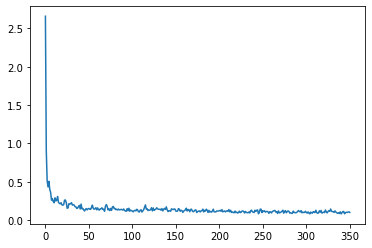

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)